In [1]:
%matplotlib widget
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import sympy
from sympy.utilities.lambdify import lambdify

# Effective sample size and a note of caution

Instead we ask the question: if we have a $q_X$, how do we mesure "how good it is"?

Recall that the self-normalized importance sampling estimator is given by a weighted combination
\begin{equation}
S*n^{nis} = \frac{\sum*{i=1}^n g(X*i) w(X_i)}{\sum*{i=1}^n w(X_i)}
\end{equation}
This is an **unequally weighted** arithmetic mean. In extreme settings we might have only a single weight be non-zero. This would be that effectively only a single sample mattered for the final result. In the rare event example above, we saw that the weights span a large order of magnitude of values. In such intermediate cases we would like some measure of the weights that provides us intuition into the "effective number of samples."

There are many possible quantities that could be used for an "effective sample size." (see Owen Chapter 9 for several examples) One commonly used metric is

\begin{equation}
n*{ess} = \frac{(\sum*{i=1}^n w^{(i)})^2}{\sum*{i=1}^n w^{(i)^2}} = n\frac{\bar{w}^2}{\bar{w^2}}
\end{equation}
where $\bar{w} = \frac{1}{n}\sum*{i=1}^n w^{(i)}$ and $\bar{w^2} = \frac{1}{n} \sum_{i=1}^n w^{(i)^2}.$

This estimator essentially some sort of measure of variance of the weights if you recall $Var(X) = \mathbb{E}\left[X^2\right] - \mathbb{E}\left[X\right]^2$ and the denominator and numerator stand for each of these terms (respectively). If these terms are equal then the variance is zero (effective sample size is $n$), otherwise it is smaller.

This estimator has the following three desirable properties (proofs are in the notes)

1. $n_{ess} = 1$ if and only if $w^{(i)} = \beta \delta_{ik}$; in other words if only one weight is non-zero then the effective sample size is 1
2. $n_{ess} = n$ if and only if $w^{(i)} = \beta / n$ for all $i$; in other words the effective sample size is equal to the actual sample size only if all the weights are equal
3. $1 \leq n_{ess} \leq n$; in other words the effective sample size is always between 1 and the actual number of samples $n$

Note that this estimator is not in any way adapted to the actual function we are trying to integrate $g(X)$; it is instead a measure of quality of $q_X$ as it pertains to $f_X$ over a general set of functions $g$. One can ammend these estimates for specific cases by instead using the following weight in the effective sample size calculation
\begin{equation}
\tilde{w}^{(i)}(g) = \frac{|g(x^{(i)})|w(x^{(i)})}{\sum\_{i=1}^n |g(x^{(i)})|w(x^{(i)})}
\end{equation}
This should remind you very strongly that the optimal proposal seeks to make this quantity essentially constant.


### A note of caution: a good ess may not mean things are working

(but a bad ESS typically means things are not working) ... such is the case with many things


ESS =  17.842686231084745


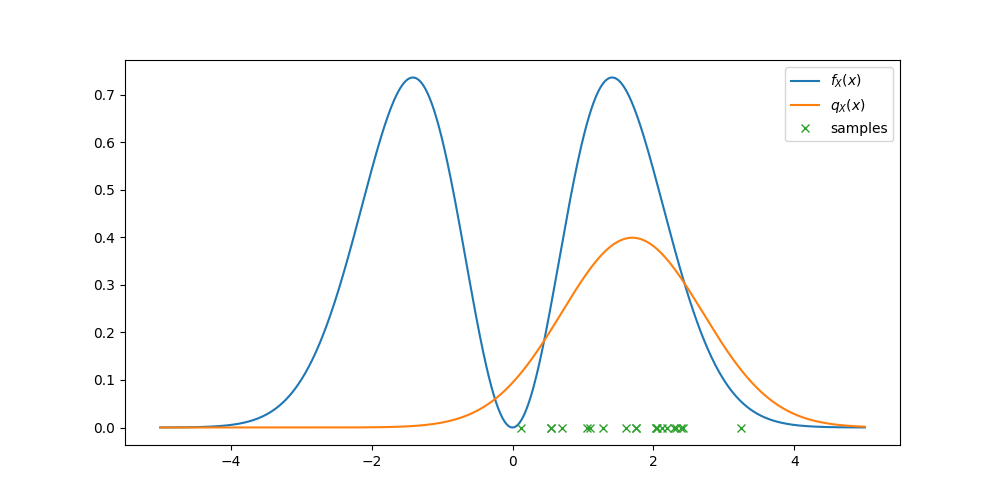

In [2]:
nsamples = 20
std = 1.0  # 2.0, 5.0
offset = 1.7  # 0.0 # 1.8, 0.0
xp = sympy.Symbol('xp')
f1 = (xp**2)*sympy.exp(-xp**2/2)
func = lambdify(xp, f1, 'numpy')
def prop(xx): return stats.norm.pdf((xx - offset), scale=std)


np.random.seed(4)
samp = np.random.randn(nsamples) * std + offset
xess = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 5))
plt.plot(xess, func(xess), label=r'$f_X(x)$')
plt.plot(xess, prop(xess), label=r'$q_X(x)$')
plt.plot(samp, 0.0*np.ones(samp.shape), 'x', label='samples')
plt.legend()

weights = func(samp) / prop(samp)
ESS = np.sum(weights)**2 / np.sum(weights**2)
print("ESS = ", ESS)

plt.show()